In [1]:
# assemble datasets
import os, shutil

original_dataset_dir='/Users/think/Downloads/kaggle_original_data/train'
base_dir='/Users/think/Downloads/cats_and_dogs_small'
os.mkdir(base_dir)

train_dir=os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir=os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir=os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir=os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir=os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir=os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir=os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir=os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir=os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [2]:
# build network
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

D:\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [3]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [4]:
# Data preprocessing
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [5]:
# fit the model using a batch generator
history=model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, 
                            validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 171s 2s/step - loss: 0.6889 - acc: 0.5440 - val_loss: 0.6710 - val_acc: 0.6220
Epoch 2/30
100/100 [==============================] - 167s 2s/step - loss: 0.6529 - acc: 0.6225 - val_loss: 0.6429 - val_acc: 0.6440
Epoch 3/30
100/100 [==============================] - 172s 2s/step - loss: 0.6091 - acc: 0.6675 - val_loss: 0.6231 - val_acc: 0.6440
Epoch 4/30
100/100 [==============================] - 168s 2s/step - loss: 0.5785 - acc: 0.6945 - val_loss: 0.6447 - val_acc: 0.6330
Epoch 5/30
100/100 [==============================] - 174s 2s/step - loss: 0.5437 - acc: 0.7250 - val_loss: 0.5896 - val_acc: 0.6760
Epoch 6/30
100/100 [==============================] - 171s 2s/step - loss: 0.5116 - acc: 0.7475 - val_loss: 0.6178 - val_acc: 0.6700
Epoch 7/30
100/100 [==============================] - 172s 2s/step - loss: 0.4891 - acc: 0.7580 - val_loss: 0.6111 - val_acc: 0.6750
Epoch 8/30
100/100 [==============================] - 169s 2s/step - 

In [6]:
# save the model
model.save('cats_and_dogs_small_1.h5')

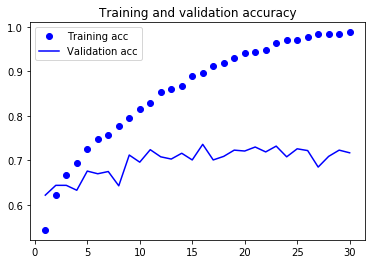

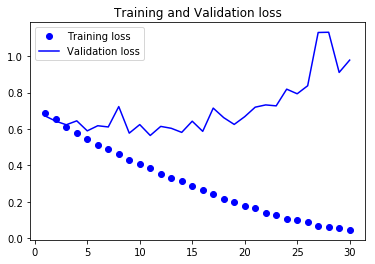

In [7]:
# display curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [9]:
# Data augmentation 
datagen=ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                          shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
# rotation_range: a range within which to randomly rotate pictures
# width_shift and height_shift: a fraction of total width or height
# shear_range: apply shearing(cutting) transformations randomly
# horizontal_flip: flip half of the images horizontally randomly
# fill_mode: a strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift

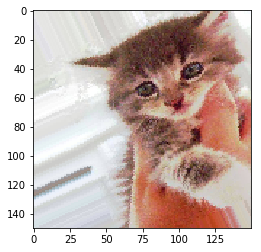

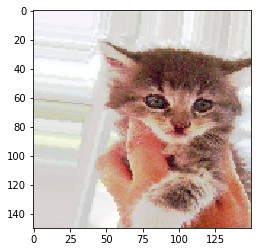

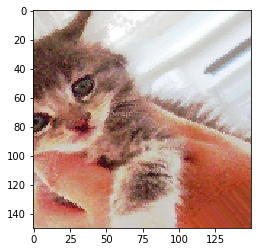

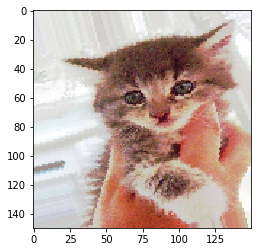

In [11]:
# Display randomly augmented training images
from keras.preprocessing import image

fnames=[os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
# pick one image to "augment"
img_path=fnames[3]
# read the image and resize it
img=image.load_img(img_path, target_size=(150,150))
# convert it to a Numpy array with shape (150,150,3)
x=image.img_to_array(img)
# shape it to (1,150,150,3)
x=x.reshape((1,)+x.shape)
# the .flow() command below generates batches of randomly transformed images
# it will loop indefinitely, so we need to break the loop at some point
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4==0:
        break
plt.show()

In [12]:
# add a dropout layer
model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [14]:
# train the convnet using data augmentation generators
train_datagen=ImageDataGenerator(rescale=1./255, rotation_range=40, 
                                 width_shift_range=0.2, height_shift_range=0.2,
                                shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

# note that the validation data should not be augmented!
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=32, class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=32, class_mode='binary')
history=model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 273s 3s/step - loss: 0.6926 - acc: 0.5256 - val_loss: 0.6793 - val_acc: 0.5463
Epoch 2/100
100/100 [==============================] - 287s 3s/step - loss: 0.6782 - acc: 0.5625 - val_loss: 0.6612 - val_acc: 0.6102
Epoch 3/100
100/100 [==============================] - 279s 3s/step - loss: 0.6712 - acc: 0.5803 - val_loss: 0.6392 - val_acc: 0.6104
Epoch 4/100
100/100 [==============================] - 282s 3s/step - loss: 0.6571 - acc: 0.6006 - val_loss: 0.6360 - val_acc: 0.6443
Epoch 5/100
100/100 [==============================] - 277s 3s/step - loss: 0.6402 - acc: 0.6197 - val_loss: 0.6185 - val_acc: 0.6466
Epoch 6/100
100/100 [==============================] - 265s 3s/step - loss: 0.6217 - acc: 0.6481 - val_loss: 0.5895 - val_acc: 0.6849
Epoch 7/100
100/100 [==============================] - 275s 3s/step - loss: 0.6248 - acc: 0.6472 - val_loss: 0.5

100/100 [==============================] - 251s 3s/step - loss: 0.4150 - acc: 0.8084 - val_loss: 0.4631 - val_acc: 0.7874
Epoch 62/100
100/100 [==============================] - 254s 3s/step - loss: 0.4120 - acc: 0.8116 - val_loss: 0.4053 - val_acc: 0.8306
Epoch 63/100
100/100 [==============================] - 257s 3s/step - loss: 0.4104 - acc: 0.8116 - val_loss: 0.4980 - val_acc: 0.7784
Epoch 64/100
100/100 [==============================] - 255s 3s/step - loss: 0.4151 - acc: 0.8106 - val_loss: 0.4317 - val_acc: 0.7996
Epoch 65/100
100/100 [==============================] - 258s 3s/step - loss: 0.4112 - acc: 0.8066 - val_loss: 0.4156 - val_acc: 0.8230
Epoch 66/100
100/100 [==============================] - 250s 2s/step - loss: 0.4144 - acc: 0.8066 - val_loss: 0.4233 - val_acc: 0.8106
Epoch 67/100
100/100 [==============================] - 251s 3s/step - loss: 0.4028 - acc: 0.8178 - val_loss: 0.4284 - val_acc: 0.8065
Epoch 68/100
100/100 [==============================] - 252s 3s/step

In [15]:
model.save('cats_and_dogs_small_2.h5')